In [ ]:
import pandas as pd
import numpy as np
import os

In [21]:
%run sqlite_execution.py
db_handler = Sqlite_Handler()
# db_handler.drop_duplicates()
info = db_handler.get_info()
info

,total,solved,unsolved
bonsai tree,675,642,33
flower,1670,500,1170
car,1493,359,1134
motorcycle,1335,309,1026
laptop,1120,303,817
tree,393,294,99
helicopter,242,242,0
cup of orange juice,166,166,0
goose,56,42,14
cat,9,0,9


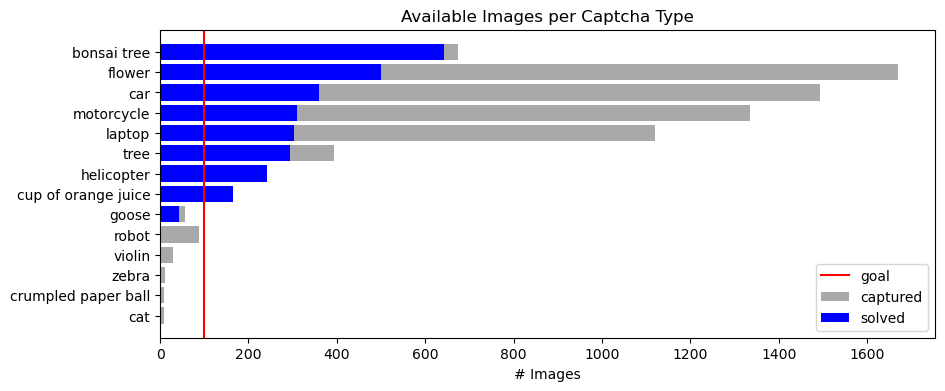

In [22]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [17]:
%run pytorch_training.py
train_model_on_captcha_string(db_handler, "bonsai tree", save=True)
# train_models_on_all_captcha_strings(db_handler, threshold=100)

Epoch: 3, Test Loss: 0.0030, Accuracy: 120/160, 75.00%
Epoch: 4, Test Loss: 0.0023, Accuracy: 134/160, 83.75%
Epoch: 5, Test Loss: 0.0017, Accuracy: 149/160, 93.12%
Epoch: 6, Test Loss: 0.0016, Accuracy: 147/160, 91.88%
Epoch: 7, Test Loss: 0.0013, Accuracy: 150/160, 93.75%
Epoch: 8, Test Loss: 0.0014, Accuracy: 146/160, 91.25%
Epoch: 9, Test Loss: 0.0014, Accuracy: 148/160, 92.50%
Epoch: 10, Test Loss: 0.0012, Accuracy: 146/160, 91.25%
Epoch: 11, Test Loss: 0.0011, Accuracy: 147/160, 91.88%
Epoch: 12, Test Loss: 0.0015, Accuracy: 147/160, 91.88%
Epoch: 13, Test Loss: 0.0011, Accuracy: 150/160, 93.75%
Epoch: 14, Test Loss: 0.0011, Accuracy: 150/160, 93.75%
Epoch: 15, Test Loss: 0.0011, Accuracy: 151/160, 94.38%
Epoch: 16, Test Loss: 0.0011, Accuracy: 151/160, 94.38%
Epoch: 17, Test Loss: 0.0011, Accuracy: 150/160, 93.75%
Epoch: 18, Test Loss: 0.0010, Accuracy: 153/160, 95.62%
Epoch: 19, Test Loss: 0.0010, Accuracy: 152/160, 95.00%
Epoch: 20, Test Loss: 0.0011, Accuracy: 152/160, 95.00%

Testing 23-224_04 on bonsai tree...
Correct: 632/642, Accuracy: 98.44%
Testing 23-224_02 on car...
Correct: 348/359, Accuracy: 96.94%
Testing 23-224_02 on flower...
Correct: 483/500, Accuracy: 96.60%
Testing 23-224_01 on helicopter...
Correct: 233/242, Accuracy: 96.28%
Testing 23-224_01 on laptop...
Correct: 296/303, Accuracy: 97.69%
Testing 23-224_01 on motorcycle...
Correct: 304/309, Accuracy: 98.38%
Testing 23-224_01 on tree...
Correct: 284/294, Accuracy: 96.60%


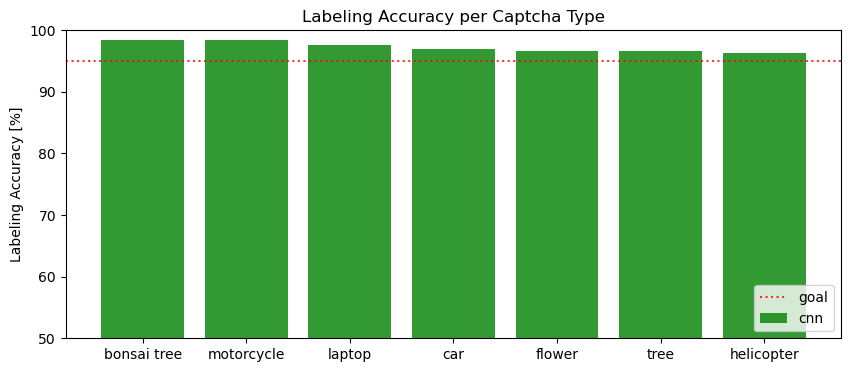

In [18]:
%run pytorch_training.py
model_accuracy = test_models_on_all_captcha_strings(db_handler)
%run visualizer.py
plot_model_accuracy(model_accuracy, figsize=(4,10))

In [ ]:
assert 1 == 0 # to avoid execution of code below

In [ ]:
%run collector/collector.py
urls = [
    "https://accounts.hcaptcha.com/demo",
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db_handler, urls[0], count=100, collect_v2=False)

In [ ]:
%run manual_classifier.py
mc = Manual_Classifier(db_handler)

In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db_handler)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))